In [1]:
# Import thư viện
import os
import cv2
import numpy as np
from pathlib import Path
import random
import shutil
import matplotlib.pyplot as plt

In [2]:
# Hàm augment ảnh tĩnh với tên file tăng dần
def augment_image_file(src_path, dst_folder, start_idx, num_aug=3):
    img = cv2.imread(str(src_path))
    if img is None:
        return
    ext = Path(src_path).suffix
    for i in range(num_aug):
        aug_img = img.copy()
        # Flip ngang ngẫu nhiên
        if random.random() > 0.5:
            aug_img = cv2.flip(aug_img, 1)
        # Xoay nhẹ ngẫu nhiên
        angle = random.uniform(-15, 15)
        M = cv2.getRotationMatrix2D((aug_img.shape[1]//2, aug_img.shape[0]//2), angle, 1)
        aug_img = cv2.warpAffine(aug_img, M, (aug_img.shape[1], aug_img.shape[0]))
        # Thay đổi độ sáng ngẫu nhiên
        value = random.randint(-30, 30)
        aug_img = np.clip(aug_img + value, 0, 255).astype(np.uint8)
        aug_name = dst_folder / f"{start_idx + i}{ext}"
        cv2.imwrite(str(aug_name), aug_img)

In [3]:
# Hàm tạo dữ liệu mô phỏng cho toàn bộ dataset ảnh tĩnh, đặt tên tăng dần
def generate_synthetic_images(data_root, num_aug=3):
    data_root = Path(data_root)
    for action_dir in data_root.iterdir():
        if not action_dir.is_dir():
            continue
        # Bỏ qua nếu là sequence (chỉ chứa .npy)
        files = list(action_dir.glob("*"))
        if all(f.suffix == ".npy" for f in files if f.is_file()):
            continue
        print(f"🔄 Augment ảnh tĩnh cho action: {action_dir.name}")
        # Tìm số lớn nhất hiện có
        max_idx = -1
        for ext in ['*.jpg', '*.jpeg', '*.png']:
            for img_file in action_dir.glob(ext):
                try:
                    idx = int(Path(img_file).stem)
                    if idx > max_idx:
                        max_idx = idx
                except ValueError:
                    continue
        # Nếu không có file số, bắt đầu từ 0
        start_idx = max_idx + 1
        # Augment từng ảnh gốc
        for ext in ['*.jpg', '*.jpeg', '*.png']:
            for img_file in action_dir.glob(ext):
                # Chỉ augment file gốc (không phải file đã augment)
                try:
                    idx = int(Path(img_file).stem)
                except ValueError:
                    continue
                augment_image_file(img_file, action_dir, start_idx, num_aug=num_aug)
                start_idx += num_aug

In [4]:
# Hàm kiểm tra dữ liệu augment ảnh tĩnh
def check_augmented_images(data_root):
    data_root = Path(data_root)
    for action_dir in data_root.iterdir():
        if not action_dir.is_dir():
            continue
        print(f"🔎 Action: {action_dir.name}")
        img_files = []
        for ext in ['*.jpg', '*.jpeg', '*.png']:
            img_files += list(action_dir.glob(ext))
        idx_list = []
        for img_file in img_files:
            try:
                idx = int(Path(img_file).stem)
                idx_list.append(idx)
            except ValueError:
                continue
        if idx_list:
            print(f"   Số lượng ảnh: {len(idx_list)}, số lớn nhất: {max(idx_list)}")
        else:
            print(f"   Không có ảnh đặt tên số.")
    print("🎉 Đã kiểm tra xong dữ liệu ảnh augment!")

In [5]:
# Thống kê và vẽ biểu đồ số lượng ảnh theo action
def plot_image_augmentation_stats(data_root):
    data_root = Path(data_root)
    actions = []
    img_counts = []
    max_idxs = []
    for action_dir in data_root.iterdir():
        if not action_dir.is_dir():
            continue
        actions.append(action_dir.name)
        img_files = []
        for ext in ['*.jpg', '*.jpeg', '*.png']:
            img_files += list(action_dir.glob(ext))
        idx_list = []
        for img_file in img_files:
            try:
                idx = int(Path(img_file).stem)
                idx_list.append(idx)
            except ValueError:
                continue
        img_counts.append(len(idx_list))
        max_idxs.append(max(idx_list) if idx_list else 0)
    plt.figure(figsize=(10,5))
    plt.bar(actions, img_counts, label="Số lượng ảnh", color="blue")
    plt.plot(actions, max_idxs, label="Số lớn nhất", color="red", marker="o")
    plt.ylabel("Số lượng / Số lớn nhất")
    plt.title("Thống kê số lượng ảnh và số lớn nhất theo action")
    plt.legend()
    plt.xticks(rotation=90)
    plt.show()

🔄 Augment ảnh tĩnh cho action: 0
🔄 Augment ảnh tĩnh cho action: 1
🔄 Augment ảnh tĩnh cho action: 2
🔄 Augment ảnh tĩnh cho action: 3
🔄 Augment ảnh tĩnh cho action: 4
🔄 Augment ảnh tĩnh cho action: 5
🔄 Augment ảnh tĩnh cho action: 6
🔄 Augment ảnh tĩnh cho action: 7
🔄 Augment ảnh tĩnh cho action: 8
🔄 Augment ảnh tĩnh cho action: 9
🔄 Augment ảnh tĩnh cho action: a
🔄 Augment ảnh tĩnh cho action: b
🔄 Augment ảnh tĩnh cho action: c
🔄 Augment ảnh tĩnh cho action: d
🔄 Augment ảnh tĩnh cho action: e
🔄 Augment ảnh tĩnh cho action: f
🔄 Augment ảnh tĩnh cho action: g
🔄 Augment ảnh tĩnh cho action: h
🔄 Augment ảnh tĩnh cho action: i
🔄 Augment ảnh tĩnh cho action: j
🔄 Augment ảnh tĩnh cho action: k
🔄 Augment ảnh tĩnh cho action: l
🔄 Augment ảnh tĩnh cho action: m
🔄 Augment ảnh tĩnh cho action: n
🔄 Augment ảnh tĩnh cho action: o
🔄 Augment ảnh tĩnh cho action: p
🔄 Augment ảnh tĩnh cho action: q
🔄 Augment ảnh tĩnh cho action: r
🔄 Augment ảnh tĩnh cho action: s
🔄 Augment ảnh tĩnh cho action: t
🔄 Augment 

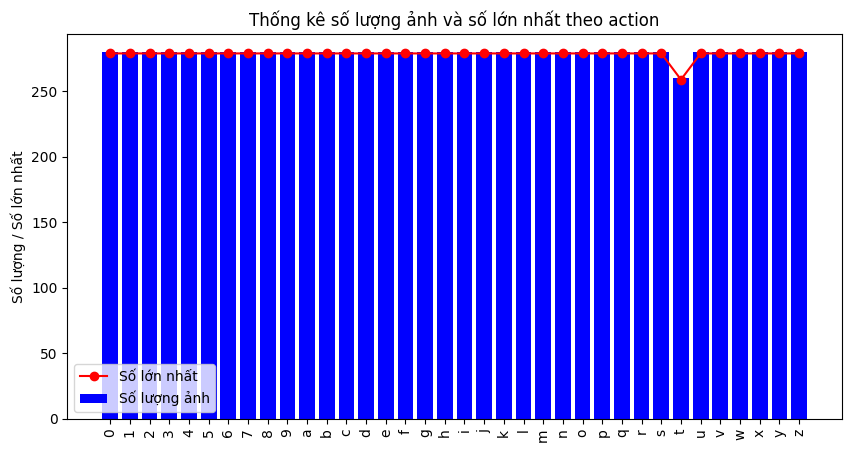

In [6]:
# Chạy augment và kiểm tra
IMG_DATA_PATH = "asl_dataset"  # Đổi thành đường dẫn thư mục ảnh tĩnh của bạn
NUM_AUG = 3

generate_synthetic_images(IMG_DATA_PATH, num_aug=NUM_AUG)
print("🎉 Đã tạo dữ liệu mô phỏng cho ảnh tĩnh!")

check_augmented_images(IMG_DATA_PATH)
plot_image_augmentation_stats(IMG_DATA_PATH)